In [3]:

from sklearn.metrics import r2_score


In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X,y = make_regression(n_samples=1000, n_features=10, n_informative=10, n_targets=1,noise=20,random_state=13)

In [6]:
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape


(800, 10)
(200, 10)
(800,)


(200,)

ValueError: x and y must be the same size

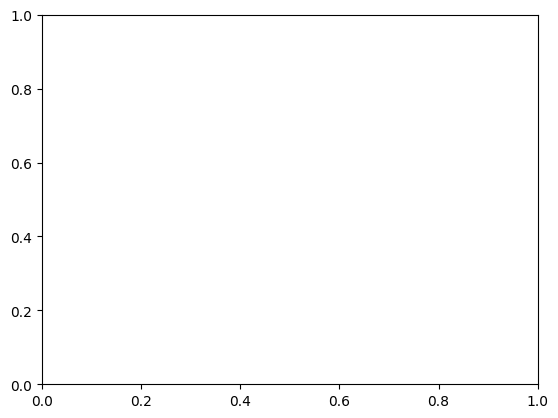

In [8]:
plt.scatter(X,y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)


[97.47375614 18.94034926 71.16064362 27.10633048 39.12499954 30.78886764
 77.58216164 18.58633321 29.97741283 65.5604317 ]
0.5763577539908553


In [11]:
from sklearn.linear_model import Ridge

In [12]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[96.44613005 18.86250497 70.48040022 26.81610325 38.72773227 30.4960732
 76.91763266 18.3958595  29.7330148  64.9001428 ]
0.6628284767859576


In [13]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[88.09443718 18.13860651 64.89995872 24.4623035  35.48476464 28.09328494
 71.41335937 16.8453496  27.69223612 59.50765776]
1.375257087588432


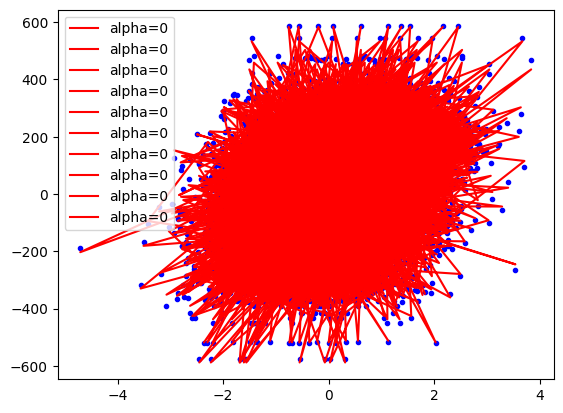

In [22]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
# plt.plot(X,rr.predict(X),color='green',label='alpha=10')
# plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [15]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()

    num = 0
    den = 0

    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)

    m = num/(den + alpha)
    b = y_mean - m*x_mean

    return m,b

In [16]:
class Ridge_regression:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)

    def predict(self,X_test):
        return (X_test*self.m) + self.b

In [17]:
reg = Ridge_regression(10)

In [18]:
reg.fit(X,y)

[98.39358769 31.67011954 70.72025687 25.78367323 38.97969344 30.96057413
 82.22655928 17.32349511 34.96522275 63.61149855] [8.10230864 9.45220832 8.66217492 9.57129853 9.30432644 9.46656331
 8.42938795 9.74245857 9.38554423 8.80599405]


In [19]:
reg.predict(X)

array([[ -77.63475546,   16.62854044, -144.04338604, ...,   26.74666271,
          38.15826512,   68.14960253],
       [  70.3474211 ,   29.53690079,  105.33841891, ...,   11.7850291 ,
          32.07081619,   48.68659569],
       [ -45.15412028,  -32.90041678,  155.67799003, ...,  -16.30518635,
          -5.90313528,   15.81089236],
       ...,
       [ 179.65793152,   25.67679735,   13.93202363, ...,  -14.62251461,
         -46.85844318,    3.85623074],
       [ -35.5653091 ,  -29.68763645,   94.29894954, ...,   18.11981198,
           6.80857388,   32.73952613],
       [-209.52889844,  -12.66467749,   58.65967792, ...,   -3.24657546,
         -10.33503363,  -69.41452226]])

In [20]:
r2_score(y,reg.predict(X))

ValueError: y_true and y_pred have different number of output (1!=10)

Now for n-dim ridge regression

In [23]:
import math

In [24]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
r2_score(y_test,lr.predict(X_test))
math.sqrt(mean_squared_error(y_test,lr.predict(X_test)))

[97.65234244 19.05919304 71.12132582 27.04269043 39.37487513 30.94281154
 77.54927647 18.64677511 29.80473067 65.420346  ]
0.64584858037089


19.983981661778667

In [26]:
rr = Ridge(alpha=10, solver = 'cholesky')
rr.fit(X_train,y_train)
print(rr.coef_)
print(rr.intercept_)
print(r2_score(y_test,rr.predict(X_test)))

[96.34306239 18.99712426 70.30286021 26.67367956 38.87336043 30.53859923
 76.68104315 18.39779681 29.45570101 64.55936941]
0.7900810841560837
0.987916114132311


In [27]:
rr1 = Ridge(alpha=100, solver = 'cholesky')
rr1.fit(X_train,y_train)
print(rr1.coef_)
print(rr1.intercept_)

[85.97691618 18.32680985 63.71199961 23.76720363 34.87712951 27.32633983
 69.66938802 16.43004589 26.64206112 57.72391093]
1.951716687502934


In [28]:
class Ridge_regression:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0  # It is done so as to remove the bias term in calculation as its intercept value
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha*I).dot(X_train.T).dot(y_train)
        self.m = result[1:]
        self.b = result[0]
    def predict(self,X_test):
        return np.dot(X_test,self.m) + self.b

In [29]:
rr = Ridge_regression(10)
rr.fit(X_train,y_train)
print(rr.m)
print(rr.b)
print(r2_score(y_test,rr.predict(X_test)))

[96.34306239 18.99712426 70.30286021 26.67367956 38.87336043 30.53859923
 76.68104315 18.39779681 29.45570101 64.55936941]
0.7900810841561059
0.987916114132311
